# Business Understanding
Business Understanding adalah tahap pertama dalam proses CRISP-DM yang berfokus pada pemahaman yang mendalam tentang tujuan bisnis dan kebutuhan yang ingin dicapai melalui proyek data mining. Pada tahap ini, tim data mining bekerja sama dengan pemangku kepentingan bisnis untuk memahami konteks bisnis dan masalah yang ingin diselesaikan.

Business Understanding dari dataset deteksi asap ini mungkin melibatkan pemahaman tentang penggunaan data untuk deteksi dan pemantauan kebakaran atau situasi berbahaya yang berkaitan dengan asap. Dataset ini mungkin berisi pengukuran dan atribut yang berkaitan dengan konsentrasi asap, suhu, kelembaban, atau faktor lain yang relevan dalam mendeteksi kebakaran.

In [74]:
import pandas as pd
import numpy as np

# Data Understanding
Tahap Data Understanding dalam CRISP-DM merupakan tahap kedua dalam proses data mining. Pada tahap ini, fokusnya adalah untuk memperoleh pemahaman yang lebih mendalam tentang data yang akan digunakan dalam proyek data mining.

Dalam konteks prediksi kebakaran dari dataset "smoke_detection_iot.csv", atribut-atribut berikut dapat memberikan informasi yang relevan:

1. Temperature[C]: Atribut ini mengukur suhu dalam satuan Celsius (°C). Suhu yang tinggi dapat meningkatkan risiko kebakaran karena dapat mempengaruhi keberlanjutan pembakaran.

2. Humidity[%]: Atribut ini mengukur tingkat kelembaban udara dalam persentase (%). Kelembaban yang rendah dapat membuat material menjadi lebih kering dan mudah terbakar, sehingga meningkatkan risiko kebakaran.

3. TVOC[ppb]: Atribut ini mengukur konsentrasi Total Volatile Organic Compounds dalam satuan parts per billion (ppb). TVOC yang tinggi dapat menunjukkan adanya senyawa organik yang mudah menguap, yang dapat berkontribusi pada potensi kebakaran.

4. eCO2[ppm]: Atribut ini mengukur konsentrasi equivalent Carbon Dioxide dalam satuan parts per million (ppm). Konsentrasi tinggi eCO2 dapat menunjukkan adanya sumber pembakaran atau keberadaan api yang dapat menyebabkan kebakaran.

5. Raw H2 dan Raw Ethanol: Atribut-atribut ini mungkin mengindikasikan pengukuran konsentrasi hidrogen (H2) dan etanol dalam bentuk mentah tanpa pemrosesan atau konversi. Konsentrasi tinggi hidrogen atau etanol dapat menunjukkan adanya potensi bahan bakar yang mudah terbakar.

6. Pressure[hPa]: Atribut ini mengukur tekanan atmosfer dalam satuan hektopascal (hPa). Meskipun tidak secara langsung terkait dengan kebakaran, perubahan tekanan atmosfer dapat mempengaruhi kondisi cuaca yang pada gilirannya dapat memengaruhi risiko kebakaran.

7. PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, CNT: Atribut-atribut ini berkaitan dengan pengukuran partikulat di udara. Partikel-partikel kecil seperti PM1.0 dan PM2.5 dapat membawa materi yang mudah terbakar dan meningkatkan risiko kebakaran. Ukuran partikel lainnya seperti NC0.5, NC1.0, dan NC2.5 juga dapat memberikan indikasi adanya partikel-partikel yang berpotensi menyebabkan kebakaran. Jumlah total partikel yang dihitung dalam atribut CNT juga dapat memberikan informasi tentang tingkat partikulat di udara.

Dengan menggunakan atribut-atribut ini, model prediksi kebakaran dapat menggunakan informasi tentang suhu, kelembaban, konsentrasi gas, partikel-partikel, dan faktor lingkungan lainnya untuk memprediksi kemungkinan terjadinya kebakaran.

# load dataset

In [75]:
df = pd.read_csv('smoke_detection_iot.csv')
df.sample()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
36812,36812,1654773161,24.25,53.48,1057,616,12813,19458,939.082,2.14,2.22,14.7,2.292,0.052,11818,1


In [76]:
df = df.rename(columns={"Temperature[C]":"Temperature","Humidity[%]":"Humidity","TVOC[ppb]":"TVOC","eCO2[ppm]":"eCO2","Raw H2":"Raw_H2","Raw Ethanol":"Raw_Ethanol","Pressure[hPa]":"Pressure", "PM1.0":"PM1","PM2.5":"PM2","NC0.5":"NC0","NC1.0":"NC1","NC2.5":"NC2","Fire Alarm":"Fire_Alarm"})

In [77]:
df = df.drop(['Unnamed: 0','UTC'], axis=1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  62630 non-null  float64
 1   Humidity     62630 non-null  float64
 2   TVOC         62630 non-null  int64  
 3   eCO2         62630 non-null  int64  
 4   Raw_H2       62630 non-null  int64  
 5   Raw_Ethanol  62630 non-null  int64  
 6   Pressure     62630 non-null  float64
 7   PM1          62630 non-null  float64
 8   PM2          62630 non-null  float64
 9   NC0          62630 non-null  float64
 10  NC1          62630 non-null  float64
 11  NC2          62630 non-null  float64
 12  CNT          62630 non-null  int64  
 13  Fire_Alarm   62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.7 MB


In [79]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    elif df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [80]:
numerical

['Temperature',
 'Humidity',
 'TVOC',
 'eCO2',
 'Raw_H2',
 'Raw_Ethanol',
 'Pressure',
 'PM1',
 'PM2',
 'NC0',
 'NC1',
 'NC2',
 'CNT',
 'Fire_Alarm']

In [81]:
catgcols

[]

In [82]:
df['Fire_Alarm'].value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

In [83]:
ind_col = [col for col in df.columns if col !='Fire_Alarm']
dep_col = 'Fire_Alarm'

In [84]:
df[dep_col].value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

# Data Preparation
Data Preparation adalah tahap dalam proses data mining di mana data disiapkan untuk analisis lebih lanjut. Pada tahap ini, tujuan utamanya adalah mempersiapkan data yang berkualitas dan sesuai untuk tahap pemodelan.

Pada tahap ini, data dikonversi atau ditransformasi menjadi format yang lebih sesuai atau cocok untuk analisis. Beberapa teknik transformasi yang umum digunakan meliputi normalisasi data, discretization (mengubah data kontinu menjadi diskrit), dan pembuatan fitur baru berdasarkan fitur yang ada.
dan juga pemilihan atribut atau fitur yang paling relevan dan berdampak signifikan terhadap hasil analisis. Memilih fitur yang tepat dapat membantu mengurangi dimensi data dan meningkatkan efisiensi dan akurasi model.

# transformasi dataset

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [86]:
df['Fire_Alarm'] = le.fit_transform(df['Fire_Alarm'])

In [87]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [88]:
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [89]:
df.to_csv('Fire_Alarm.csv', index=False)

# Modeling
Modeling (pemodelan) dalam konteks data mining merujuk pada tahap di mana berbagai teknik dan algoritma data mining diterapkan untuk membangun model prediktif atau deskriptif. Tujuan utama dari tahap pemodelan adalah untuk menggambarkan dan memahami hubungan antara variabel dalam data serta untuk memprediksi atau menggambarkan fenomena yang relevan dengan tujuan bisnis yang telah ditetapkan. Pemilihan Teknik Pemodelan teknik atau metode pemodelan yang paling sesuai untuk mencapai tujuan bisnis yang telah ditetapkan. Yaitu dengan teknik pemodelan algortima decision tree.

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# membuat model decision tree

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)


# Evaluation 
Evaluation adalah tahap dalam proses data mining di mana kinerja dan efektivitas model yang telah dibangun dievaluasi. Tujuan dari tahap evaluasi adalah untuk mengukur sejauh mana model yang dikembangkan memenuhi tujuan bisnis yang telah ditetapkan dan seberapa baik model tersebut dapat digeneralisasi ke data baru yang tidak terlihat sebelumnya.
Pertama, kriteria evaluasi yang relevan harus ditentukan sesuai dengan tujuan bisnis dan sifat masalah yang dihadapi. tujuan bisnis adalah prediksi, maka metrik evaluasi yang seperti akurasi, presisi, recall, atau F1-score. Akurasi mencakup akurasi data training dan data testing.

In [92]:
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9798818457608175
akurasi data testing = 0.9779658310713716 

confusion matrix : 
[[3598    7]
 [ 269 8652]]

classification report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      3605
           1       1.00      0.97      0.98      8921

    accuracy                           0.98     12526
   macro avg       0.96      0.98      0.97     12526
weighted avg       0.98      0.98      0.98     12526



# Deployment
Deployment adalah tahap dalam proses data mining di mana model yang telah dibangun dan dievaluasi digunakan dan diimplementasikan dalam lingkungan operasional. Pada tahap ini, model yang telah teruji akan diterapkan dalam situasi nyata untuk memberikan manfaat bisnis yang nyata.
Dataset yang telah di preparation dideployment menjadi dataset Fire_Alarm.csv

# simulasi model

In [93]:
input_data = (-5.29,56.26,234,400,13132,20028,939.562,0.62,0.64,4.27,0.666,0.015,7012)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Tidak Terjadi Kebakaran')
else:
    print ('Telah Terjadi Kebakaran')

[1]
Telah Terjadi Kebakaran


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# visualisasi pohon keputusan

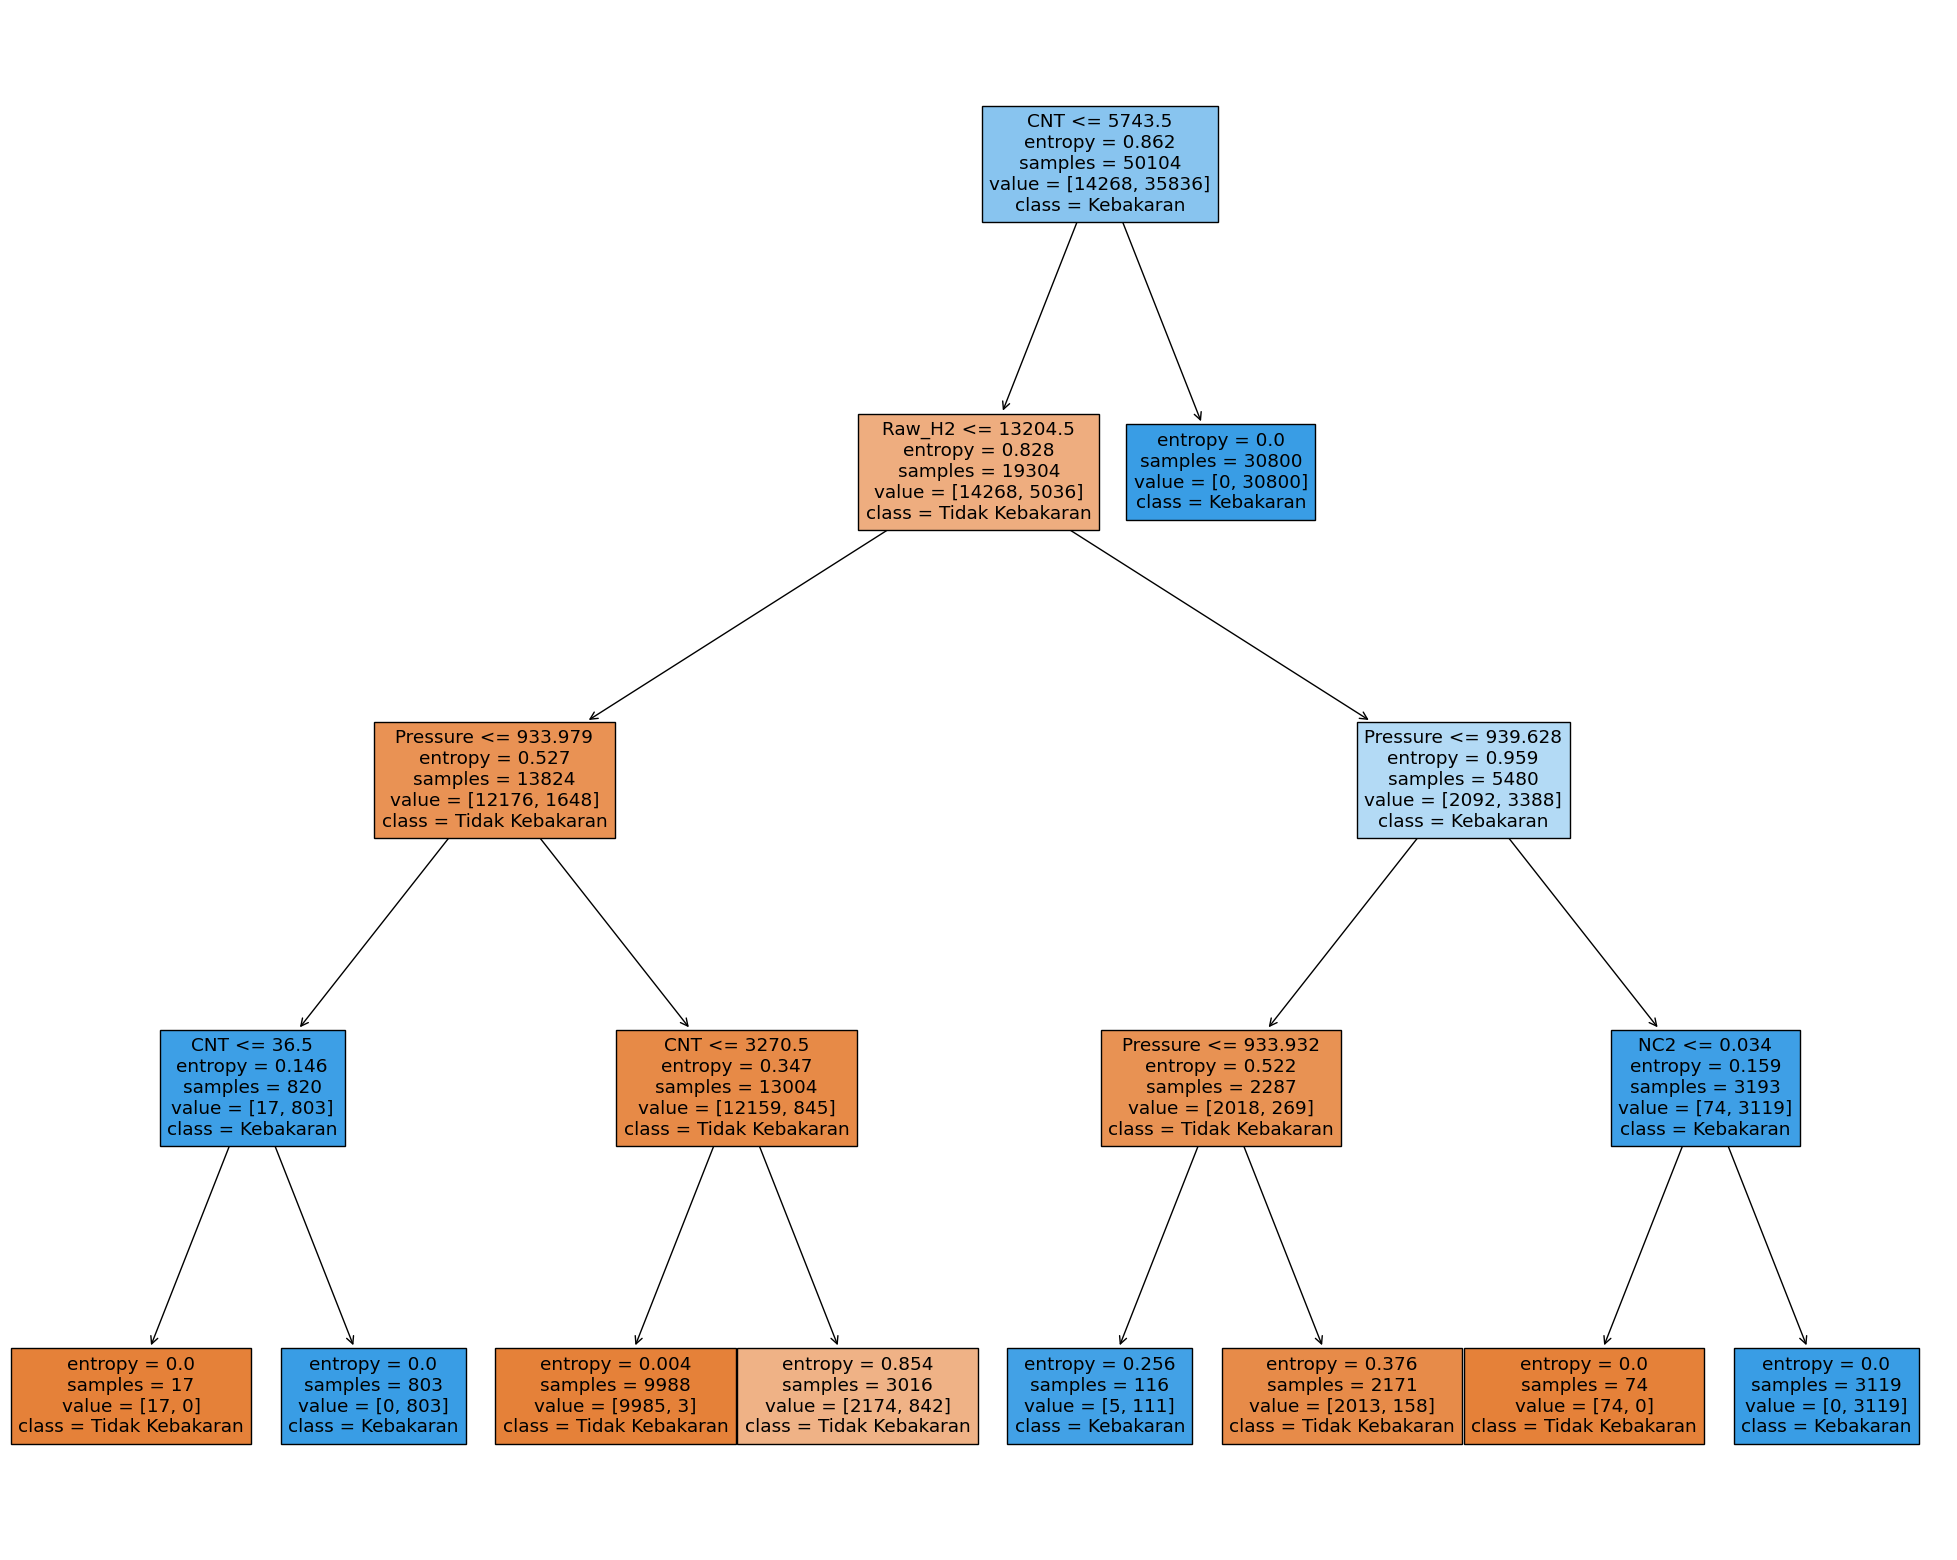

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['Tidak Kebakaran', 'Kebakaran'],
                   filled=True)         